In [1]:
import pandas as pd
import pickle
import numpy as np

## Load the data frame, and the dictionary

In [2]:
df = pd.read_csv("../../data/compressed_Iowa_Alcohol.csv")
df.head()

,Date,Store Number,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,11/20/2015,2191,56.0,NaN,255.0,297,6,750,$18.09,$27.14,6,$162.84
1,11/21/2015,2205,73.0,NaN,255.0,297,6,750,$18.09,$27.14,12,$325.68
2,11/16/2015,3549,56.0,NaN,130.0,249,20,150,$6.40,$9.60,2,$19.20
3,11/04/2015,2513,52.0,NaN,65.0,237,3,1750,$35.55,$53.34,3,$160.02
4,11/17/2015,3942,86.0,NaN,130.0,249,20,150,$6.40,$9.60,2,$19.20


In [3]:
with open("../../data/all_dict.dat", "rb") as f:
    all_dict = pickle.load(f)

In [4]:
all_dict

{'address': {'2191': ['1013 MAIN', 'KEOKUK', '52632'],
  '2205': ['900 E WASHINGTON', 'CLARINDA', '51632'],
  '3549': ['1414 48TH ST', 'FORT MADISON', '52627'],
  '2513': ['812  S 1ST AVE', 'IOWA CITY', '52240'],
  '3942': ['104 HIGHWAY 30 WEST', 'TOLEDO', '52342'],
  '3650': ['118 South Main St.', 'HOLSTEIN', '51025'],
  '2538': ['1422 FLAMMANG DR', 'WATERLOO', '50702'],
  '2662': ['522 MULBERRY, SUITE A', 'MUSCATINE', '52761'],
  '4307': ['117 IOWA AVE', 'DUNLAP', '712-2'],
  '2661': ['1989 PARK ST', 'SHELDON', '51201'],
  '2561': ['4605 FLEUR DRIVE', 'DES MOINES', '50321'],
  '4114': ['704 W 7TH ST PO BOX 372', 'ATLANTIC', '50022'],
  '2806': ['1307 N SECOND', 'CLINTON', '52732'],
  '2624': ['2395 NW ARTERIAL RD', 'DUBUQUE', '52002'],
  '2572': ['6301 UNIVERSITY', 'CEDAR FALLS', '50613'],
  '2595': ['1620  4TH AVE, SOUTH', 'DENISON', '51442'],
  '3723': ['1023  9TH ST', 'ONAWA', '51040'],
  '2665': ['1005 E HICKMAN RD', 'WAUKEE', '50263'],
  '5093': ['1220 N CODY RD', 'LE CLAIRE', '

## Replace the spaces and "(" with "_"

In [5]:
col_names = df.columns
col_names_cleaned = col_names.map(lambda x: x.lower().replace(" number", "").replace(" ", "_").replace("(", "").replace(")", ""))
print(col_names)
print(col_names_cleaned)
df.columns = col_names_cleaned
df.head()

Index(['Date', 'Store Number', 'County Number', 'Category', 'Vendor Number',
       'Item Number', 'Pack', 'Bottle Volume (ml)', 'State Bottle Cost',
       'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)'],
      dtype='object')
Index(['date', 'store', 'county', 'category', 'vendor', 'item', 'pack',
       'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale_dollars'],
      dtype='object')


,date,store,county,category,vendor,item,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars
0,11/20/2015,2191,56.0,NaN,255.0,297,6,750,$18.09,$27.14,6,$162.84
1,11/21/2015,2205,73.0,NaN,255.0,297,6,750,$18.09,$27.14,12,$325.68
2,11/16/2015,3549,56.0,NaN,130.0,249,20,150,$6.40,$9.60,2,$19.20
3,11/04/2015,2513,52.0,NaN,65.0,237,3,1750,$35.55,$53.34,3,$160.02
4,11/17/2015,3942,86.0,NaN,130.0,249,20,150,$6.40,$9.60,2,$19.20


## calculate the total volume sold, multiple bottle_volume_ml with bottles_sold

In [6]:
import numpy as np
df["volume_sold_ml"] = np.multiply(df["bottle_volume_ml"], df["bottles_sold"])
df.head()

,date,store,county,category,vendor,item,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_ml
0,11/20/2015,2191,56.0,NaN,255.0,297,6,750,$18.09,$27.14,6,$162.84,4500
1,11/21/2015,2205,73.0,NaN,255.0,297,6,750,$18.09,$27.14,12,$325.68,9000
2,11/16/2015,3549,56.0,NaN,130.0,249,20,150,$6.40,$9.60,2,$19.20,300
3,11/04/2015,2513,52.0,NaN,65.0,237,3,1750,$35.55,$53.34,3,$160.02,5250
4,11/17/2015,3942,86.0,NaN,130.0,249,20,150,$6.40,$9.60,2,$19.20,300


## split the date into the year

In [7]:
df["year"] = df.apply(lambda x: x["date"].split("/")[-1], axis=1)
df.head()

,date,store,county,category,vendor,item,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_ml,year
0,11/20/2015,2191,56.0,NaN,255.0,297,6,750,$18.09,$27.14,6,$162.84,4500,2015
1,11/21/2015,2205,73.0,NaN,255.0,297,6,750,$18.09,$27.14,12,$325.68,9000,2015
2,11/16/2015,3549,56.0,NaN,130.0,249,20,150,$6.40,$9.60,2,$19.20,300,2015
3,11/04/2015,2513,52.0,NaN,65.0,237,3,1750,$35.55,$53.34,3,$160.02,5250,2015
4,11/17/2015,3942,86.0,NaN,130.0,249,20,150,$6.40,$9.60,2,$19.20,300,2015


In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

## calculate the total alcohol sold per year

In [19]:
total_alcohol_sold = pd.DataFrame({"total_alcohol_sold": df.groupby(["year"])["volume_sold_ml"].sum()}).reset_index()
total_alcohol_sold

,year,total_alcohol_sold
0,2012,18755307116
1,2013,18576486260
2,2014,19157653000
3,2015,19617740031
4,2016,14508169404
5,2017,2150915303


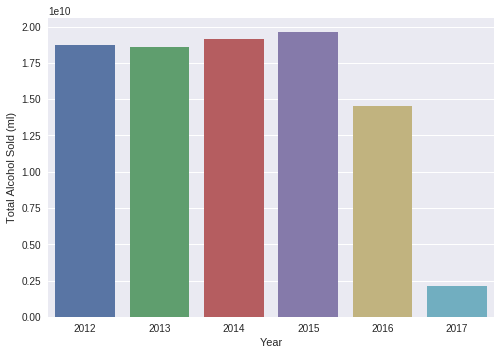

In [21]:
sns.barplot(x="year", y="total_alcohol_sold", data=total_alcohol_sold)
plt.xlabel("Year")
plt.ylabel("Total Alcohol Sold (ml)")
plt.show()